In [1]:
!pip install matplotlib wordcloud pandas numpy

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 8.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.1 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 2.1 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.2 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 2.3 MB/s e

In [2]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Define the path to the data folder
data_folder = "../data"

# Load all text files from the folder
def load_text_files(folder):
    documents = []
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            with open(os.path.join(folder, filename), "r", encoding="utf-8") as file:
                documents.append(file.read())
    return documents

# Load documents
docs = load_text_files(data_folder)
print(f"Loaded {len(docs)} text files.")

Loaded 5 text files.


Document Length Distribution

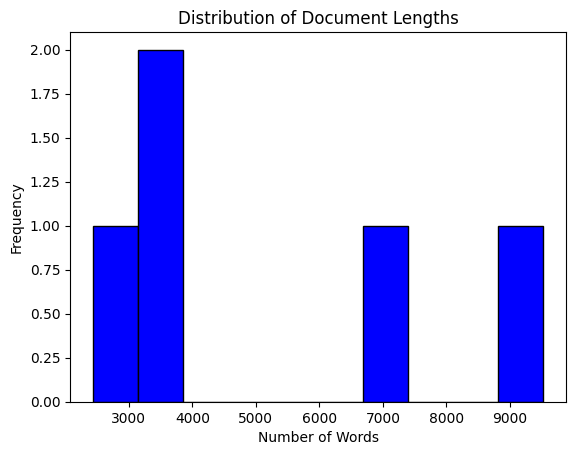

In [3]:
# Calculate document lengths (in words)
doc_lengths = [len(doc.split()) for doc in docs]

# Plot histogram
plt.hist(doc_lengths, bins=10, edgecolor='black', color='blue')
plt.title("Distribution of Document Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Word Cloud of Common Terms

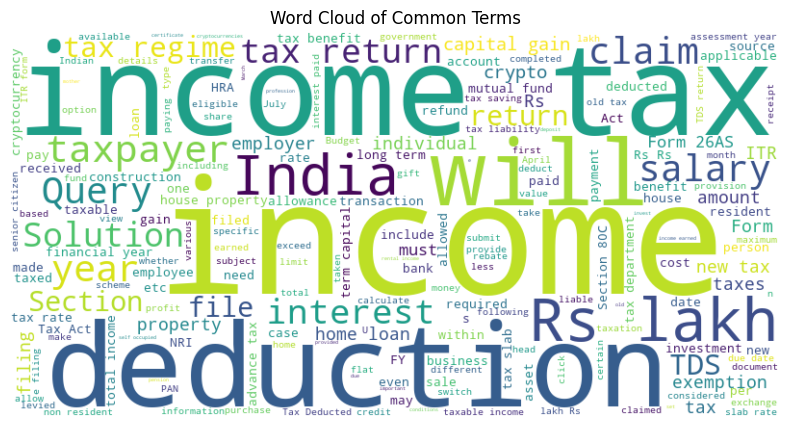

In [4]:
# Combine all documents into a single string
all_text = " ".join(docs)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Common Terms")
plt.show()

Topic Distribution

In [8]:
import os
import matplotlib.pyplot as plt

# Define the path to the data folder
data_folder = "../data"

# Load all text files from the folder
def load_text_files(folder):
    documents = []
    filenames = []
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            with open(os.path.join(folder, filename), "r", encoding="utf-8") as file:
                documents.append(file.read())
                filenames.append(filename)
    return documents, filenames

# Load documents and filenames
docs, filenames = load_text_files(data_folder)
print(f"Loaded {len(docs)} text files.")

Loaded 5 text files.


In [12]:
topic_keywords = {
    "Cryptocurrency": ["crypto", "NFT", "virtual digital asset", "VDAs", "cryptocurrency"],
    "Tax Deductions": ["80C", "deduction", "investment", "PPF", "LIC", "home loan", "tax saving"],
    "Medical Expenses": ["medical", "health", "physiotherapy", "80D", "nursing", "hospital", "surgery"],
    "Tax Regimes": ["tax regime", "old regime", "new regime", "tax slab", "income tax", "tax system"],
    "Other": []  # Default topic for files that don't match any keywords
}

# Function to assign a topic to a document based on keywords
def assign_topic(doc):
    for topic, keywords in topic_keywords.items():
        for keyword in keywords:
            if keyword.lower() in doc.lower():
                print(f"Matched keyword '{keyword}' for topic '{topic}'")
                return topic
    return "Other"  # Default topic if no keywords match

# Assign topics to each document
topics = [assign_topic(doc) for doc in docs]

Matched keyword 'crypto' for topic 'Cryptocurrency'
Matched keyword '80C' for topic 'Tax Deductions'
Matched keyword '80C' for topic 'Tax Deductions'
Matched keyword '80C' for topic 'Tax Deductions'
Matched keyword '80C' for topic 'Tax Deductions'


In [13]:
from collections import Counter

topic_counts = Counter(topics)

# Convert to lists for plotting
topics_list = list(topic_counts.keys())
counts_list = list(topic_counts.values())

print("Topic Counts:", topic_counts)

Topic Counts: Counter({'Tax Deductions': 4, 'Cryptocurrency': 1})


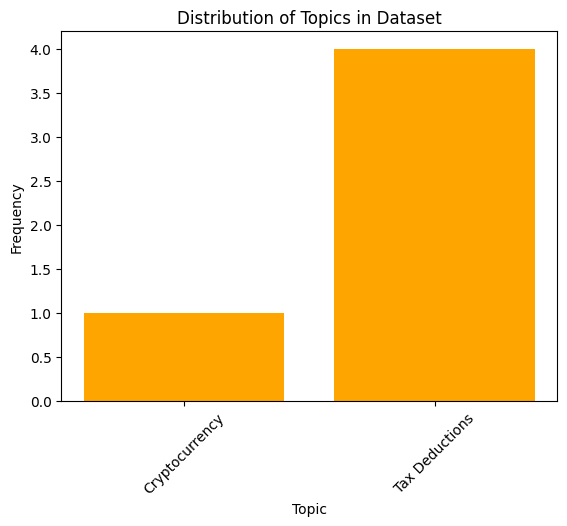

In [14]:
plt.bar(topics_list, counts_list, color='orange')
plt.title("Distribution of Topics in Dataset")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

Query-Solution Pair Analysis

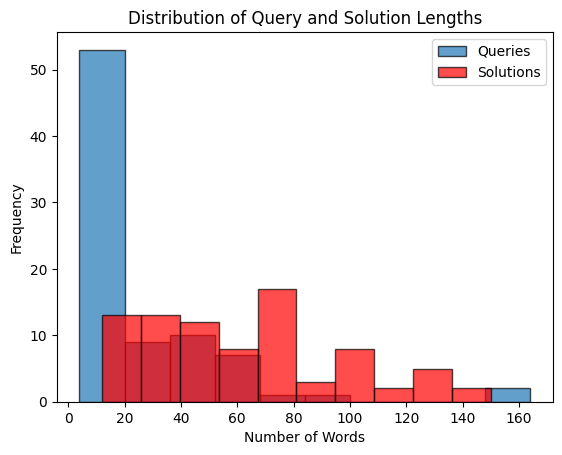

In [16]:
# Example: Extract queries and solutions (assuming a specific format)
queries = []
solutions = []
for doc in docs:
    lines = doc.split("\n")
    for line in lines:
        if line.startswith("Query:"):
            queries.append(line.replace("Query:", "").strip())
        elif line.startswith("Solution:"):
            solutions.append(line.replace("Solution:", "").strip())

# Calculate lengths
query_lengths = [len(query.split()) for query in queries]
solution_lengths = [len(solution.split()) for solution in solutions]

# Plot histograms
plt.hist(query_lengths, bins=10, edgecolor='black', alpha=0.7, label='Queries')
plt.hist(solution_lengths, bins=10, edgecolor='black', alpha=0.7, color='red', label='Solutions')
plt.title("Distribution of Query and Solution Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()